[View in Colaboratory](https://colab.research.google.com/github/PiyuGandhi/Optimization-Strategies/blob/master/Optimization_Strategies_Difference.ipynb)

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.utils import np_utils

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

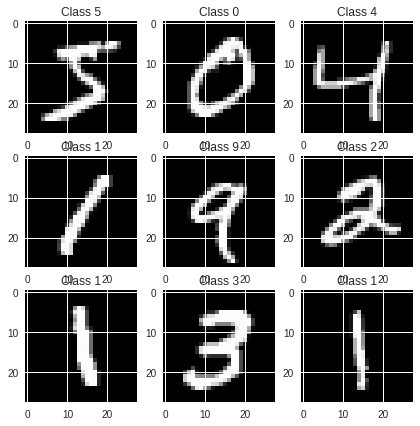

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network

In [0]:
def analyze_approach(optimizer= 'adam'):
  model = Sequential()
  model.add(Dense(512, input_shape=(784,)))
  model.add(Dense(10))
  model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                   # ensures the output is a valid probaility distribution, that is
                                   # that its values are all non-negative and sum to 1.
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics= ['accuracy'])
  print(model.summary())
  print("Training Model")
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5, 
          verbose=1,
          validation_data=(X_test, Y_test))
  score = model.evaluate(X_test, Y_test, verbose=1)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])
  # The predict_classes function outputs the highest probability class
  # according to the trained classifier for each input example.
  predicted_classes = model.predict_classes(X_test)

  # Check which items we got right / wrong
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
  plt.figure()
  print("Visualising Predictions:")
  for i, correct in enumerate(correct_indices[:9]):
      plt.subplot(3,3,i+1)
      plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
      plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

  plt.figure()
  for i, incorrect in enumerate(incorrect_indices[:9]):
      plt.subplot(3,3,i+1)
      plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
      plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  return model, score[1], history



Now let's look at the performance of different visualizers

## Adam

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Training Model
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3659 - acc: 0.8945 - val_loss: 0.3002 - val_acc: 0.9181
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2980 - acc: 0.9170 - val_loss: 0.2736 - val_acc: 0.9222
Epoch 3/5
60000/60000 [==============================] - 3

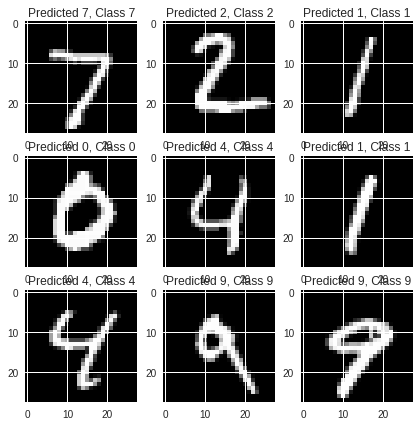

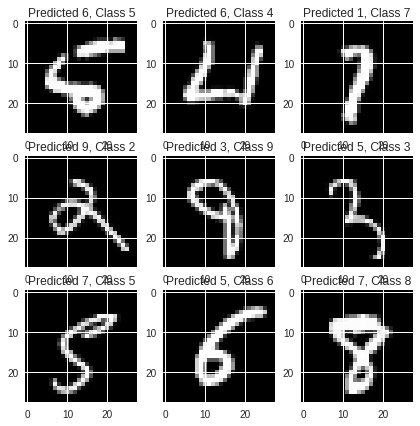

In [8]:
model_adam, accuracy_adam, history_adam = analyze_approach()

## RMSProp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Training Model
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3828 - acc: 0.8885 - val_loss: 0.3202 - val_acc: 0.9075
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3090 - acc: 0.9131 - val_loss: 0.2946 - val_acc: 0.9198
Epoch 3/5
60000/60000 [==============================] - 2

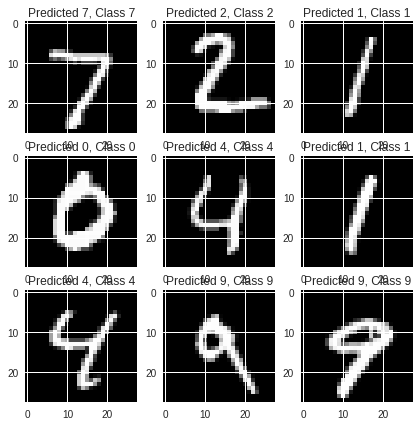

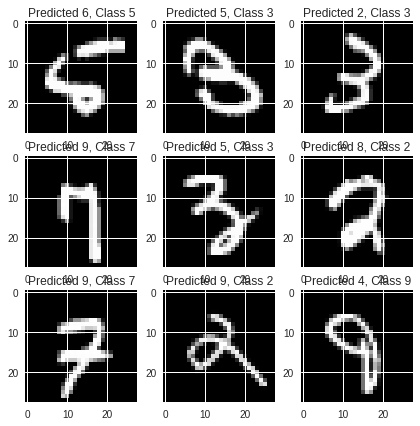

In [9]:
model_rms, accuracy_rms, history_rms = analyze_approach('rmsprop')

## Stochastic Gradient Descent

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Training Model
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.8713 - acc: 0.7908 - val_loss: 0.5118 - val_acc: 0.8765
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4743 - acc: 0.8764 - val_loss: 0.4095 - val_acc: 0.8935
Epoch 3/5
60000/60000 [==============================] - 2

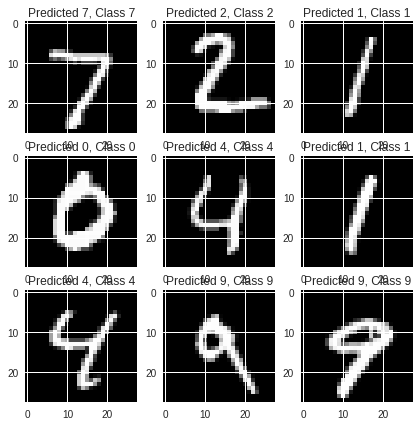

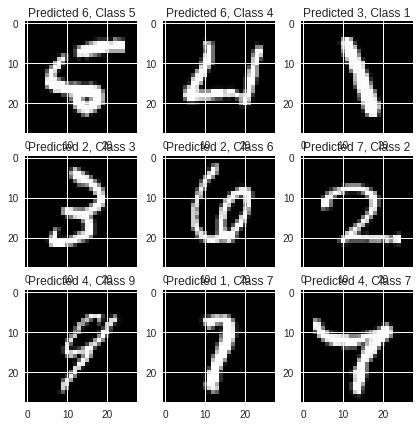

In [10]:
model_sgd, accuracy_sgd, history_sgd = analyze_approach('sgd')

## AdaGrad

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Training Model
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3664 - acc: 0.8981 - val_loss: 0.2895 - val_acc: 0.9172
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2818 - acc: 0.9210 - val_loss: 0.2754 - val_acc: 0.9238
Epoch 3/5
60000/60000 [==============================] - 2

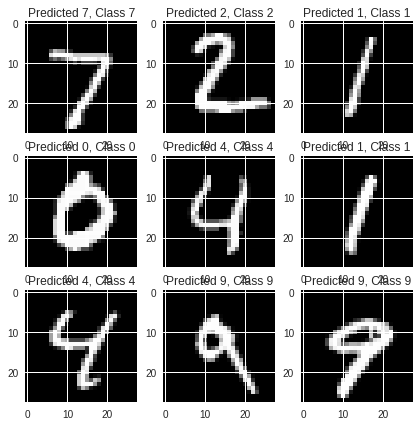

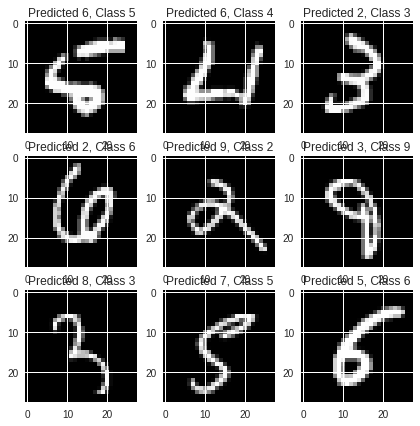

In [11]:
model_ada, accuracy_ada, history_ada = analyze_approach('adagrad')